<a href="https://colab.research.google.com/github/HairuoGao029/MasterThesis/blob/main/Experiments_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MSc/dcrnn

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MSc/dcrnn


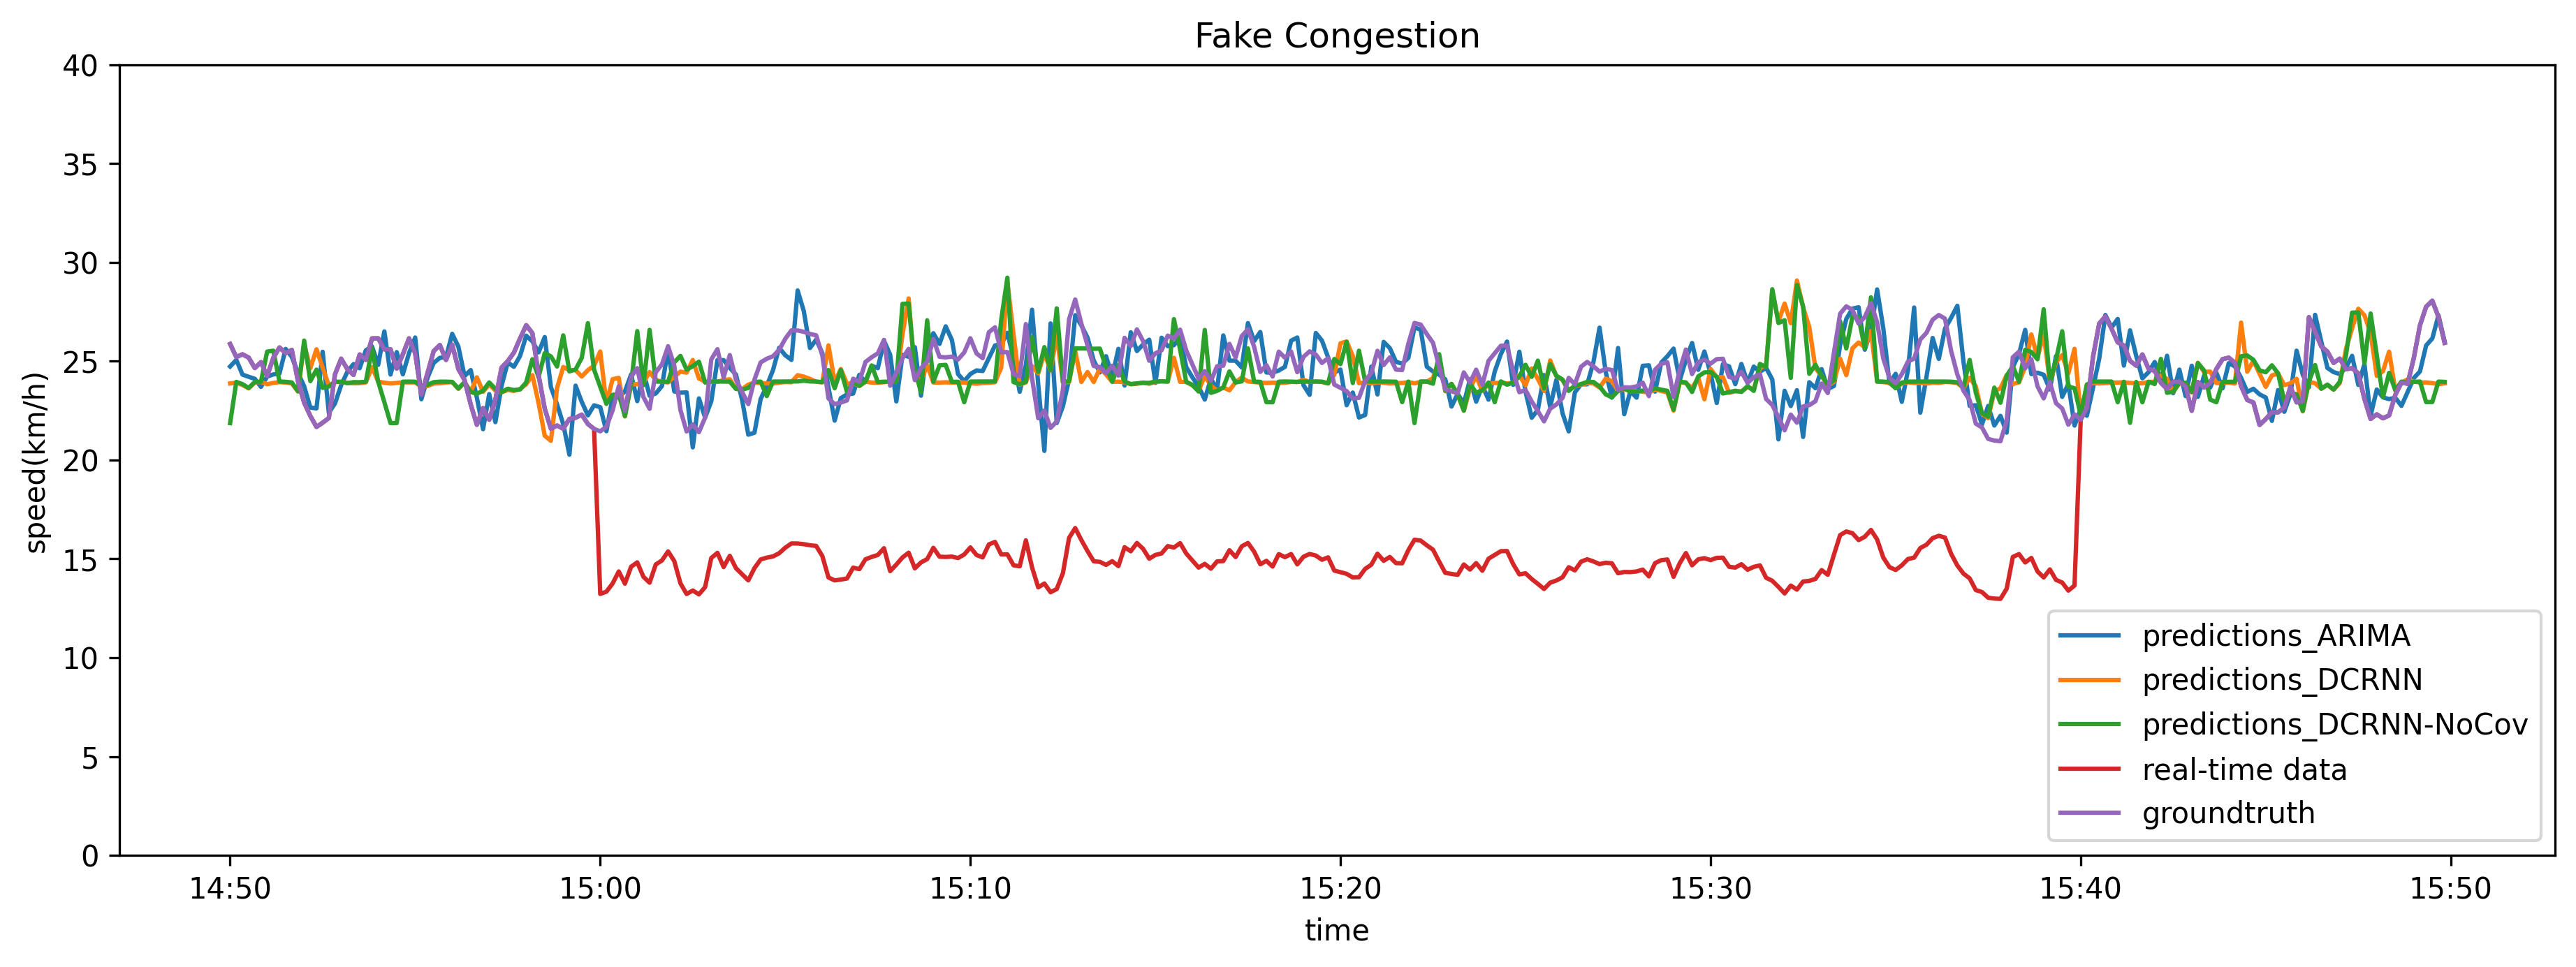

In [74]:
# figures

result_dcrnn = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn.npz', allow_pickle=True)
result_dcrnn_nocov = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn_nocov.npz', allow_pickle=True)
result_arima = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/ARIMA_98.npy') # change the lane_index
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_30.npy', allow_pickle=True) # real time data
b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True) # ground truth


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

xs1 = []  # Custom abscissa
for i in ['14:40','14:50','15:00','15:10','15:20','15:30','15:40','15:50']:
    xs1.append(i)
scale1 = np.arange(len(xs1)) 
xs2 = []  
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50','18:00','18:10']:
    xs2.append(i)
scale2 = np.arange(len(xs2)) 
xs3 = []  
for i in ['16:40','16:50','17:00','17:10','17:20','17:30','17:40','17:50']:
    xs3.append(i)
scale3 = np.arange(len(xs3))

t1 = 1740
t2 = 2100
lane_id = 98
plt.figure(2,figsize=(15, 5), dpi=300) 
plt.xticks(scale1,xs1) 
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60))
plt.plot(result_arima[t1-145:t2-145].tolist())
#plt.plot(data[2460:2940].tolist())
plt.plot(result_dcrnn['predictions'][1,t1:t2,lane_id])
plt.plot(result_dcrnn_nocov['predictions'][11,t1:t2,lane_id])
plt.plot(a[lane_id][1][t1:t2])
plt.plot(b[lane_id][1][t1:t2])
plt.ylim(0,40)
plt.legend(labels=["predictions_ARIMA","predictions_DCRNN","predictions_DCRNN-NoCov","real-time data","groundtruth"],loc="lower right")
plt.title("Fake Congestion")
plt.xlabel('time')
plt.ylabel('speed(km/h)')
#plt.savefig('/content/drive/MyDrive/MSc/dcrnn/data/result/1002/fake_3.png', dpi=300)
plt.show()

In [3]:
def MASE(a,b):
  error = []
  for i in range(len(a)):
    error.append(a[i]-b[i])

  squaredError = []
  absError = []
  for val in error:
    squaredError.append(val * val)
    absError.append(abs(val))

  from math import sqrt
  mse = sum(squaredError)/len(squaredError)
  mae = sum(absError)/len(absError)
  return mse, mae

In [155]:
# Attack detection
# DCRNN applied
# Print MSE and MAE for differnet traffic condition

result = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn.npz', allow_pickle=True) # prediction result of DCRNN
lane_list = np.load('/content/drive/MyDrive/MSc/net/lane_list.npy', allow_pickle=True)
#real_time = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_FE_30.npy', allow_pickle=True) # real time data

state = 'congestion free'

if state == 'congestion free': 
  lane_id = '56250003#0_0%1'
  time1 = 1750
elif state == 'real congestion on previously congested road': 
  lane_id = '238459506.6_0%1'
  time1 = 2000 # 15:30-15:50
elif state == 'real congestion on uncongested road': 
  lane_id = '27146231#2.0_0%0'
  time1 = 2540 # 17:00-17:20
elif state == 'fake congestion': 
  lane_id = '56250003#0_0%1'
  time1 = 1800 # 15:00-15:20
elif state == 'congestion prolong': 
  lane_id = '238459506.6_0%1'
  time1 = 2760 # 17:40-18:00
elif state == 'middle masking': 
  real_time = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_M_mid_30.npy', allow_pickle=True) # real time data
  lane_id = '238459506.6_0%1'
  time1 = 2640 # 17:20-17:40
elif state == 'beginning masking': 
  real_time = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_M_beginning_30.npy', allow_pickle=True) # real time data
  lane_id = '238459506.6_0%1'
  time1 = 2520 # 17:00-17:40

lane_index = lane_list.tolist().index(lane_id)
predict = result['predictions'][1,time1:time1+6,lane_index] 
target = real_time[lane_index][1][time1:time1+6]
mse, mae = MASE(predict, target)

print('MSE = ', mse)
print('MAE = ', mae)

MSE =  6.821337757824073
MAE =  2.384240739861614


In [142]:
# User distinction
# Investigation of Various Attack Strategies
# print accuracy

exp = 'FE_30' # fake congestion and congestion prolong; 30,50,70=30%,50%,70%
#exp = 'M_beginning_50'

individual = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_'+exp+'.npy', allow_pickle=True).item() # individual measurenets include attackers
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_'+exp+'.npy', allow_pickle=True)  # real-time data
result_dcrnn = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn.npz', allow_pickle=True)
result_dcrnn_nocov = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/smalldata_0.npz', allow_pickle=True)
lane_list = np.load('/content/drive/MyDrive/MSc/net/lane_list.npy', allow_pickle=True)

# Parameters
# fake congestion: 
#  single lane: '56250003#0_0%1', multiple lane: '237111029#1.254_0%1'
#  time1 = 1800, time2 = 00
# congestion prolong: 
#  single lane: '238459506.6_0%1', multiple lane: '62830645#2.0.0_0%1'
#  time1 = 2760, time2 = 270
# middle mask: 
#  single lane: '238459506.6_0%1', multiple lane: '62830645#2.0.0_0%1'
#  time1 = 2640, time2 = 150
# beginning mask: 
#  single lane: '238459506.6_0%1', multiple lane: '62830645#2.0.0_0%1'
#  time1 = 2520, time2 = 30

id = ['56250003#0_0%1', '237111029#1.254_0%1', '238459506.6_0%1', '62830645#2.0.0_0%1']
lane_id = id[2]
time1 = 2760
time2 = 270
lane_index = lane_list.tolist().index(lane_id)

result_arima = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/ARIMA_'+str(lane_index)+'.npy') 

predict1 = result_dcrnn['predictions'][1,time1:time1+6,lane_index]
predict2 = result_dcrnn_nocov['predictions'][1,time2:time2+6,lane_index]
predict3 = result_arima[time1-145:time1+6-145].tolist() 

 
for predict in [predict1, predict2, predict3]:
  # MSE MAE
  target1 = a[lane_index][1][time1:time1+6]
  mse, mae = MASE(predict, target1)
  print('MSE = ', mse)
  print('MAE = ', mae)

  # accuracy
  target = individual[lane_id]['Original'][1:7] # individual measurements
  attacker = list(individual[lane_id]['Attacker'][1:7]) # attacker measurements

  acc_all = []
  acc_att = []
  at = []
  for i in range(len(target)):
    atta = list(attacker[i])
    if atta[0] == 'N':
      continue
    for sample in target[i]:
      error = sample[0]-predict[i]
      squaredError = error * error
      absError = abs(error)
      at.append(squaredError)
      if squaredError > 1*mse:   # threshold
      #if absError > 1*mae:   # threshold
        if sample[1] in atta:
          atta.remove(sample[1])
          acc_att.append(1)
          acc_all.append(1)
        else:
          acc_all.append(0)
    acc_att.extend(np.zeros(len(atta), dtype=int, order='C'))
    acc_all.extend(np.zeros(len(atta), dtype=int, order='C'))

  # Results for DCRNN, DCRNN_NoCov, ARIMA in order
  print('ACC for all users = ', np.mean(acc_all)) # N(Correctly distinguished users)/N(users)
  print('ACC for attackers = ', np.mean(acc_att)) # N(Correctly distinguished attackers)/N(attackers)

MSE =  131.46226618778053
MAE =  11.234773437500003
ACC for all users =  0.9523809523809523
ACC for attackers =  1.0
MSE =  149.93411592197194
MAE =  11.8162057800293
ACC for all users =  0.8695652173913043
ACC for attackers =  1.0
MSE =  65.44172693597754
MAE =  7.840328985895344
ACC for all users =  0.9523809523809523
ACC for attackers =  1.0


In [146]:
# User distinction
# Investigation of Parameter Effect
# DCRNN
# print accuracy

exp = 'FE_30'
lane_id = '238459506.6_0%1'
time1 = 2760
lane_index = lane_list.tolist().index(lane_id)
a = np.load('/content/drive/MyDrive/MSc/datasets/0810/8h_d20_'+exp+'.npy', allow_pickle=True)
result_dcrnn = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn.npz', allow_pickle=True)

# percentage and speed
# individual_FE_'attacker percentage'_'speed'
individual = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_FE_50_5.npy', allow_pickle=True).item() 
# location
# location1~4: datasets/0810/individual_FE_30.npy, datasets/0913/individual_FE_30_linlane.npy, datasets/0913/individual_FE_30_linlane.npy, datasets/0913/individual_FE_30.npy
individual = np.load('/content/drive/MyDrive/MSc/datasets/0810/individual_FE_30.npy', allow_pickle=True).item()


# MSE MAE
predict1 = result_dcrnn['predictions'][1,time1:time1+6,lane_index] 
target1 = a[lane_index][1][time1:time1+6]

mse, mae = MASE(predict1, target1)

print('MSE = ', mse)
print('MAE = ', mae)

# accuracy
target = individual[lane_id]['Original'][1:7]
attacker = list(individual[lane_id]['Attacker'][1:7])
predict = result_dcrnn['predictions'][1,time1:time1+6,lane_index]

acc_all = []
acc_att = []
at = []
for i in range(len(target)):
  atta = list(attacker[i])
  if atta[0] == 'N':
    continue
  for sample in target[i]:
    error = sample[0]-predict[i]
    squaredError = error * error
    absError = abs(error)
    at.append(absError)
    
    if absError > 1*mae:   # MAE
      if sample[1] in atta:
        atta.remove(sample[1])
        acc_att.append(1)
        acc_all.append(1)
      else:
        acc_all.append(0)
  acc_att.extend(np.zeros(len(atta), dtype=int, order='C'))
  acc_all.extend(np.zeros(len(atta), dtype=int, order='C'))

print('ACC for all users = ', np.mean(acc_all))
print('ACC for attackers = ', np.mean(acc_att))

MSE =  131.46226618778053
MAE =  11.234773437500003
ACC for all users =  0.9090909090909091
ACC for attackers =  1.0


In [234]:
# Gradual attack
# DCRNN
# print speed offset and estimated duration

from math import log, exp

result_dcrnn = np.load('/content/drive/MyDrive/MSc/dcrnn/data/result/dcrnn.npz', allow_pickle=True)
b = np.load('/content/drive/MyDrive/MSc/datasets/averagespeed/0718/8h_d20.npy', allow_pickle=True) # ground truth

print('fake congestion')
lane_id = '56250003#0_0%1' # fake
time1 = 1100
lane_index = lane_list.tolist().index(lane_id)

predict_1 = result_dcrnn['predictions'][0,time1:time1+1,lane_index] # 1 min horizon
predict_5 = result_dcrnn['predictions'][1,time1:time1+1,lane_index] # 5 min horizon
target = b[lane_index][1][time1:time1+1]
target1 = [i*pow(0.988,1) for i in target]
mse_1 = MASE(predict_1, target)[0]
mse_5 = MASE(predict_5, target)[0]
offset_1 = 1-pow(mse_1,0.5)/target[0]
offset_5 = 1-pow(mse_5,0.5)/target[0]
print('speed offset every 1 min: ', offset_1)
print('Estimated duration (min): ', log(0.65, offset_1))
print('speed offset every 5 min: ', offset_5)
print('Estimated duration (min): ', log(0.65, offset_5)*5)

print('mask congestion from the middle')
lane_id = '238459506.6_0%1' # middle mask
time1 = 2640
lane_index = lane_list.tolist().index(lane_id)

# Maximum tolerable MSE
predict_1 = result_dcrnn['predictions'][0,time1:time1+1,lane_index] # 1 min horizon
predict_5 = result_dcrnn['predictions'][1,time1:time1+1,lane_index] # 5 min horizon
target = b[lane_index][1][time1:time1+1]
target1 = [i*pow(0.988,1) for i in target]
mse_1 = MASE(predict_1, target)[0]
mse_5 = MASE(predict_5, target)[0]
offset_1 = 1+pow(mse_1,0.5)/target[0]
offset_5 = 1+pow(mse_5,0.5)/target[0]
print('speed offset every 1 min: ', offset_1)
print('Estimated duration (min): ', log(0.65*b[lane_index][1][2400]/target[0], offset_1))
print('speed offset every 5 min: ', offset_5)
print('Estimated duration (min): ', log(0.65*b[lane_index][1][2400]/target[0], offset_5)*5)

fake congestion
speed offset every 1 min:  0.9875174965319771
Estimated duration (min):  34.29509664606808
speed offset every 5 min:  0.9855831417578536
Estimated duration (min):  148.32293039952287
mask congestion from the middle
speed offset every 1 min:  1.4207826497957692
Estimated duration (min):  4.112107959123359
speed offset every 5 min:  1.058479068456219
Estimated duration (min):  127.05679739843
